In [2]:
import pandas as pd
import glob
import os
import pypfopt as pyp
import quantstats as qs
import numpy as np
import matplotlib.pyplot as plt
import utils as u
%load_ext autoreload

In [5]:
%reload_ext autoreload
%autoreload 2


## Read in Data and create functions for data cleaning and standardization

In [9]:
x = pd.read_hdf('C:\\Users\\evank\\PycharmProjects\\RL_Virtu\\2022\\01\\20220103_prices.h5').set_index('time_utc')

FileNotFoundError: File C:\Users\evank\PycharmProjects\RL_Virtu\2022\01\20220103_prices.h5 does not exist

In [19]:
x

,symbol,bidprice1,askprice1
time_utc,,,
2022-01-02 23:00:00.014215,EUR.USD.SPOT,1.13714,1.13781
2022-01-02 23:00:00.014267,EUR.USD.SPOT,1.13714,1.13780
2022-01-02 23:00:00.115289,EUR.USD.SPOT,1.13714,1.13800
2022-01-02 23:00:00.155221,EUR.USD.SPOT,1.13714,1.13787
2022-01-02 23:00:00.205117,EUR.USD.SPOT,1.13780,1.13787
...,...,...,...
2022-01-03 21:59:59.525095,EUR.USD.SPOT,1.12930,1.12995
2022-01-03 21:59:59.555021,AUD.USD.SPOT,0.71835,0.71970
2022-01-03 21:59:59.900067,NZD.USD.SPOT,0.67765,0.67915


In [22]:
pd.unique(x.symbol)

array(['EUR.USD.SPOT', 'USD.JPY.SPOT', 'USD.CAD.SPOT', 'AUD.USD.SPOT',
       'GBP.USD.SPOT', 'NZD.USD.SPOT', 'USD.MXN.SPOT', 'EUR.NOK.SPOT',
       'EUR.SEK.SPOT', 'USD.TRY.SPOT'], dtype=object)

In [3]:
def data_frame_by_freq(df: pd.DataFrame, freq: str):
    sym_list = list(pd.unique(df.symbol))
    asset_dict = {}
    for sym in sym_list:
        one_sym_df = df[df.symbol == sym]
        resamp = one_sym_df.resample(freq).last().drop(columns='symbol')
        asset_dict[sym] = resamp
    return pd.concat(asset_dict, axis=1).dropna(how='all').fillna(method='ffill')

In [4]:
data_frame_by_freq(x, '1Min')

EUR.USD.SPOT           USD.JPY.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00      1.13756   1.13773      115.095   115.131   
2022-01-02 23:01:00      1.13764   1.13773      115.088   115.117   
2022-01-02 23:02:00      1.13775   1.13783      115.108   115.119   
2022-01-02 23:03:00      1.13782   1.13788      115.105   115.115   
2022-01-02 23:04:00      1.13785   1.13788      115.095   115.104   
...                          ...       ...          ...       ...   
2022-01-03 21:55:00      1.12976   1.12981      115.349   115.355   
2022-01-03 21:56:00      1.12971   1.12976      115.348   115.355   
2022-01-03 21:57:00      1.12971   1.12977      115.348   115.355   
2022-01-03 21:58:00      1.12975   1.12981      115.320   115.334   
2022-01-03 21:59:00      1.12930   1.12995      115.300   115.365   

                    USD.CAD.SPOT           AUD.USD.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00      1.26360   1.26402      0.72714   0.72729   
2022-01-02 23:01:00      1.26300   1.26338      0.72722   0.72740   
2022-01-02 23:02:00      1.26328   1.26343      0.72727   0.72740   
2022-01-02 23:03:00      1.26326   1.26345      0.72731   0.72740   
2022-01-02 23:04:00      1.26354   1.26376      0.72726   0.72739   
...                          ...       ...          ...       ...   
2022-01-03 21:55:00      1.27453   1.27465      0.71901   0.71907   
2022-01-03 21:56:00      1.27453   1.27465      0.71902   0.71908   
2022-01-03 21:57:00      1.27455   1.27468      0.71902   0.71908   
2022-01-03 21:58:00      1.27441   1.27464      0.71908   0.71914   
2022-01-03 21:59:00      1.27415   1.27465      0.71835   0.71970   

                    GBP.USD.SPOT           NZD.USD.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00      1.35314   1.35375      0.68160   0.68599   
2022-01-02 23:01:00      1.35324   1.35371      0.68346   0.68488   
2022-01-02 23:02:00      1.35312   1.35343      0.68399   0.68511   
2022-01-02 23:03:00      1.35305   1.35330      0.68424   0.68491   
2022-01-02 23:04:00      1.35302   1.35335      0.68439   0.68473   
...                          ...       ...          ...       ...   
2022-01-03 21:55:00      1.34776   1.34794      0.67850   0.67861   
2022-01-03 21:56:00      1.34774   1.34789      0.67850   0.67861   
2022-01-03 21:57:00      1.34774   1.34789      0.67845   0.67856   
2022-01-03 21:58:00      1.34766   1.34783      0.67859   0.67872   
2022-01-03 21:59:00      1.34705   1.34900      0.67765   0.67910   

                    USD.MXN.SPOT           EUR.NOK.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00     20.48270  20.53560      10.0044   10.0349   
2022-01-02 23:01:00     20.48590  20.53190      10.0061   10.0334   
2022-01-02 23:02:00     20.49045  20.52964      10.0077   10.0282   
2022-01-02 23:03:00     20.49025  20.52906      10.0076   10.0281   
2022-01-02 23:04:00     20.49470  20.53026      10.0059   10.0281   
...                          ...       ...          ...       ...   
2022-01-03 21:55:00     20.49590  20.50080      10.0168   10.0260   
2022-01-03 21:56:00     20.50380  20.51240      10.0168   10.0260   
2022-01-03 21:57:00     20.50380  20.51240      10.0164   10.0266   
2022-01-03 21:58:00     20.49660  20.51050      10.0169   10.0267   
2022-01-03 21:59:00     20.49400  20.54900      10.0080   10.0420   

                    EUR.SEK.SPOT           USD.TRY.SPOT            
                       bidprice1 askprice1    bidprice1 askprice1  
time_utc        

In [4]:
def combine_files_freq(directory: str, ext: str, freq: str = None, last = False):
    path = directory
    df_list = []
    try:
        for folder in os.listdir(path):
            file_names = glob.glob(path +folder +'/*.' + ext)
            for file in file_names:
                try:
                    x = pd.read_hdf(file).set_index('time_utc')
                    if freq:
                        x = data_frame_by_freq(x, freq)
                    if last:
                        x = pd.DataFrame(x.iloc[-1,:]).transpose()
                    df_list.append(x)
                except:
                    print('File Failure: ' + file)
        full_df = pd.concat(df_list)
    except:
        file_names = glob.glob(path + '/*.' + ext)
        for file in file_names:
            try:
                x = pd.read_hdf(file).set_index('time_utc')
                if freq:
                    x = data_frame_by_freq(x, freq)
                if last:
                    x = pd.DataFrame(x.iloc[-1,:]).transpose()
                df_list.append(x)
            except:
                print('File Failure: ' + file)
        full_df = pd.concat(df_list)
    return full_df

In [7]:
train_df = combine_files_freq('../2022/', 'h5', '1h')

File Failure: ../2022/02\20220228_prices.h5


In [8]:
train_df

EUR.USD.SPOT           USD.JPY.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00      1.13727   1.13730      115.141   115.148   
2022-01-03 00:00:00      1.13618   1.13622      115.279   115.284   
2022-01-03 01:00:00      1.13584   1.13587      115.211   115.217   
2022-01-03 02:00:00      1.13425   1.13428      115.276   115.280   
2022-01-03 03:00:00      1.13481   1.13485      115.275   115.280   
...                          ...       ...          ...       ...   
2022-06-30 16:00:00      1.04820   1.04835      135.660   135.680   
2022-06-30 17:00:00      1.04795   1.04810      135.655   135.675   
2022-06-30 18:00:00      1.04800   1.04815      135.555   135.575   
2022-06-30 19:00:00      1.04785   1.04800      135.675   135.700   
2022-06-30 20:00:00      1.04705   1.04895      135.585   135.795   

                    USD.CAD.SPOT           AUD.USD.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00      1.26593   1.26602      0.72673   0.72680   
2022-01-03 00:00:00      1.26535   1.26543      0.72655   0.72658   
2022-01-03 01:00:00      1.26618   1.26626      0.72553   0.72561   
2022-01-03 02:00:00      1.26728   1.26736      0.72519   0.72526   
2022-01-03 03:00:00      1.26782   1.26790      0.72484   0.72490   
...                          ...       ...          ...       ...   
2022-06-30 16:00:00      1.28710   1.28725      0.69115   0.69125   
2022-06-30 17:00:00      1.28635   1.28650      0.69100   0.69115   
2022-06-30 18:00:00      1.28690   1.28705      0.69065   0.69080   
2022-06-30 19:00:00      1.28720   1.28725      0.69035   0.69050   
2022-06-30 20:00:00      1.28715   1.28745      0.69000   0.69055   

                    GBP.USD.SPOT           NZD.USD.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00      1.35210   1.35223      0.68386   0.68402   
2022-01-03 00:00:00      1.35165   1.35181      0.68471   0.68480   
2022-01-03 01:00:00      1.35170   1.35184      0.68375   0.68385   
2022-01-03 02:00:00      1.35040   1.35051      0.68317   0.68328   
2022-01-03 03:00:00      1.34989   1.35003      0.68308   0.68318   
...                          ...       ...          ...       ...   
2022-06-30 16:00:00      1.21760   1.21780      0.62500   0.62515   
2022-06-30 17:00:00      1.21760   1.21785      0.62475   0.62490   
2022-06-30 18:00:00      1.21815   1.21835      0.62440   0.62495   
2022-06-30 19:00:00      1.21725   1.21735      0.62460   0.62470   
2022-06-30 20:00:00      1.21625   1.21875      0.62385   0.62485   

                    USD.MXN.SPOT           EUR.NOK.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00     20.48610  20.49280      10.0028   10.0061   
2022-01-03 00:00:00     20.48530  20.49210      10.0040   10.0072   
2022-01-03 01:00:00     20.50168  20.50999      10.0071   10.0195   
2022-01-03 02:00:00     20.52201  20.53000      10.0165   10.0280   
2022-01-03 03:00:00     20.52771  20.53705      10.0151   10.0300   
...                          ...       ...          ...       ...   
2022-06-30 16:00:00     20.07700  20.08500      10.3095   10.3200   
2022-06-30 17:00:00     20.06600  20.07500      10.3095   10.3185   
2022-06-30 18:00:00     20.12700  20.13400      10.3205   10.3295   
2022-06-30 19:00:00     20.10000  20.11000      10.3185   10.3255   
2022-06-30 20:00:00     20.08900  20.14900      10.3185   10.3295   

                    EUR.SEK.SPOT           USD.TRY.SPOT            
                       bidprice1 askprice1    bidprice1 askprice1  
time_utc        

In [47]:
def mid_price_df(multi_df):
    subcols = multi_df.columns.get_level_values(1).unique()
    new_df = []
    for col in multi_df.columns.get_level_values(0).unique():
        mid = pd.DataFrame((multi_df[(col, subcols[0])] + multi_df[(col, subcols[1])])/2)
        mid.columns = [col]
        new_df.append(mid)
    return pd.concat(new_df, axis=1)

In [142]:
mid = mid_price_df(train_df)
mid

,EUR.USD.SPOT,USD.JPY.SPOT,USD.CAD.SPOT,AUD.USD.SPOT,GBP.USD.SPOT,NZD.USD.SPOT,USD.MXN.SPOT,EUR.NOK.SPOT,EUR.SEK.SPOT,USD.TRY.SPOT
time_utc,,,,,,,,,,
2022-01-02 23:00:00,1.137645,115.1130,1.263810,0.727215,1.353445,0.683795,20.509150,10.01965,10.29310,NaN
2022-01-02 23:01:00,1.137685,115.1025,1.263190,0.727310,1.353475,0.684170,20.508900,10.01975,10.29470,NaN
2022-01-02 23:02:00,1.137790,115.1135,1.263355,0.727335,1.353275,0.684550,20.510045,10.01795,10.29495,NaN
2022-01-02 23:03:00,1.137850,115.1100,1.263355,0.727355,1.353175,0.684575,20.509655,10.01785,10.29540,NaN
2022-01-02 23:04:00,1.137865,115.0995,1.263650,0.727325,1.353185,0.684560,20.512480,10.01700,10.29370,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-29 20:55:00,1.054560,129.8650,1.285850,0.706060,1.257515,0.645800,20.426400,9.89050,10.35735,NaN
2022-04-29 20:56:00,1.054445,129.8550,1.285925,0.705975,1.257670,0.645810,20.427500,9.89050,10.35720,NaN
2022-04-29 20:57:00,1.054470,129.8525,1.285745,0.706185,1.257540,0.645735,20.427300,9.89050,10.35615,NaN


In [145]:
def df_to_usd(df):
    cols = df.columns.get_level_values(0).unique()
    cols_list = []
    new_df = pd.DataFrame()
    for col in cols:
        if col[4:7] == 'USD':
            new_df[col] = 1/df[col]
            col = 'USD.' + col[:3] + '.SPOT'
        elif col[:3] == 'EUR':
            try:
                new_df[col] = df[col] * df['USD.EUR.SPOT']
            except:
                new_df[col] = df[col] / df['EUR.USD.SPOT']
            col = 'USD.' + col[4:7] + '.SPOT'
        else:
            new_df[col] = df[col]
        cols_list.append(col)
    new_df.columns = cols_list
    new_df = new_df.sort_index()
    return new_df

In [146]:
df_usd = df_to_usd(mid)
df_usd

,USD.EUR.SPOT,USD.JPY.SPOT,USD.CAD.SPOT,USD.AUD.SPOT,USD.GBP.SPOT,USD.NZD.SPOT,USD.MXN.SPOT,USD.NOK.SPOT,USD.SEK.SPOT,USD.TRY.SPOT
time_utc,,,,,,,,,,
2022-01-02 23:00:00,0.879009,115.1130,1.263810,1.375109,0.738855,1.462427,20.509150,8.807361,9.047726,NaN
2022-01-02 23:01:00,0.878978,115.1025,1.263190,1.374930,0.738839,1.461625,20.508900,8.807139,9.048814,NaN
2022-01-02 23:02:00,0.878897,115.1135,1.263355,1.374882,0.738948,1.460814,20.510045,8.804744,9.048199,NaN
2022-01-02 23:03:00,0.878850,115.1100,1.263355,1.374844,0.739003,1.460760,20.509655,8.804192,9.048117,NaN
2022-01-02 23:04:00,0.878839,115.0995,1.263650,1.374901,0.738997,1.460792,20.512480,8.803329,9.046504,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-29 20:55:00,0.948263,129.8650,1.285850,1.416310,0.795219,1.548467,20.426400,9.378793,9.821490,NaN
2022-04-29 20:56:00,0.948366,129.8550,1.285925,1.416481,0.795121,1.548443,20.427500,9.379816,9.822418,NaN
2022-04-29 20:57:00,0.948344,129.8525,1.285745,1.416060,0.795203,1.548623,20.427300,9.379594,9.821190,NaN


In [54]:
minute_df = combine_files_freq('C:/Users/evank/PycharmProjects/RL_Virtu/2022/', 'h5', '1Min')

Failure: C:/Users/evank/PycharmProjects/RL_Virtu/2022/02\20220228_prices.h5


In [75]:
minute_df.dropna(how='all').to_csv('C:/Users/evank/PycharmProjects/RL_Virtu/cleaned_data/minute_data_bid_ask.csv')

In [147]:
minute_df_mid_usd = df_to_usd(mid_price_df(minute_df))

In [148]:
minute_df_mid_usd.to_csv('C:/Users/evank/PycharmProjects/RL_Virtu/cleaned_data/minute_data_mid_usd.csv')

In [149]:
#get daily as last point in each file
daily_df = combine_files_freq('C:/Users/evank/PycharmProjects/RL_Virtu/2022/01/', 'h5', '1h', last=True)
daily_df = daily_df.fillna(method='ffill')
daily_df

EUR.USD.SPOT           USD.JPY.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
2022-01-03 21:00:00      1.12930   1.12995      115.300   115.365   
2022-01-04 21:00:00      1.12865   1.12880      116.125   116.190   
2022-01-05 21:00:00      1.13111   1.13174      116.088   116.155   
2022-01-06 21:00:00      1.12891   1.13005      115.800   115.850   
2022-01-07 21:00:00      1.13585   1.13630      115.515   115.605   
2022-01-10 21:00:00      1.13205   1.13290      115.150   115.255   
2022-01-11 21:00:00      1.13620   1.13695      115.285   115.300   
2022-01-12 21:00:00      1.14405   1.14450      114.630   114.640   
2022-01-13 21:00:00      1.14540   1.14555      114.160   114.237   
2022-01-14 21:00:00      1.14020   1.14170      114.190   114.300   
2022-01-18 21:00:00      1.13212   1.13285      114.585   114.650   
2022-01-19 21:00:00      1.13417   1.13433      114.320   114.340   
2022-01-20 21:00:00      1.13090   1.13140      114.070   114.080   
2022-01-21 21:00:00      1.13390   1.13485      113.650   113.710   
2022-01-24 21:00:00      1.13220   1.13295      113.882   113.995   
2022-01-25 21:00:00      1.12990   1.13030      113.845   113.875   
2022-01-26 21:00:00      1.12355   1.12425      114.604   114.695   
2022-01-27 21:00:00      1.11400   1.11515      115.360   115.375   
2022-01-28 21:00:00      1.11410   1.11575      115.180   115.260   
2022-01-31 21:00:00      1.12320   1.12415      115.074   115.160   

                    USD.CAD.SPOT           AUD.USD.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
2022-01-03 21:00:00      1.27415   1.27465      0.71835   0.71970   
2022-01-04 21:00:00      1.27015   1.27175      0.72305   0.72425   
2022-01-05 21:00:00      1.27540   1.27585      0.72190   0.72225   
2022-01-06 21:00:00      1.27250   1.27355      0.71600   0.71645   
2022-01-07 21:00:00      1.26355   1.26485      0.71785   0.71825   
2022-01-10 21:00:00      1.26730   1.26895      0.71550   0.71760   
2022-01-11 21:00:00      1.25715   1.25795      0.72095   0.72110   
2022-01-12 21:00:00      1.25055   1.25135      0.72835   0.72860   
2022-01-13 21:00:00      1.25185   1.25230      0.72805   0.72905   
2022-01-14 21:00:00      1.25475   1.25615      0.71955   0.72175   
2022-01-18 21:00:00      1.25105   1.25160      0.71825   0.71865   
2022-01-19 21:00:00      1.25135   1.25160      0.72100   0.72125   
2022-01-20 21:00:00      1.24995   1.25055      0.72240   0.72285   
2022-01-21 21:00:00      1.25715   1.25885      0.71705   0.71955   
2022-01-24 21:00:00      1.26335   1.26445      0.71405   0.71490   
2022-01-25 21:00:00      1.26205   1.26335      0.71405   0.71555   
2022-01-26 21:00:00      1.26650   1.26775      0.71135   0.71175   
2022-01-27 21:00:00      1.27390   1.27455      0.70310   0.70355   
2022-01-28 21:00:00      1.27615   1.27720      0.69765   0.70015   
2022-01-31 21:00:00      1.27005   1.27145      0.70630   0.70710   

                    GBP.USD.SPOT           NZD.USD.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
2022-01-03 21:00:00      1.34705   1.34900      0.67765   0.67910   
2022-01-04 21:00:00      1.35205   1.35400      0.67600   0.68625   
2022-01-05 21:00:00      1.35475   1.35625      0.67905   0.67995   
2022-01-06 21:00:00      1.35245   1.35375      0.67425   0.67525   
2022-01-07 21:00:00      1.35765   1.35975      0.67705   0.67885   
2022-01-10 21:00:00      1.35725   1.35790      0.67525   0.67665   
2022-01-11 21:00:00      1.36335   1.36375      0.67840   0.67880   
2022-01-12 21:00:00      1.36925   1.37075      0.68445   0.68595   
2022-01-13 21:00:00      1.37005   1.37100      0.68555   0.68675   
2022-01-14 21:00:00      1.36525   1.36850      0.67895   0.68155   
2022-01-18 21:00:00      1.35910   1.35980      0.67660   0.67785   
2022-01-19 21:00:00      1.36100   1.36145      0.67795   0.67915   
2022-01-20 21:00

In [150]:
daily_df_mid_usd = df_to_usd(mid_price_df(daily_df))
daily_df_mid_usd.to_csv('C:/Users/evank/PycharmProjects/RL_Virtu/cleaned_data/daily_data_mid_usd.csv')
daily_df.to_csv('C:/Users/evank/PycharmProjects/RL_Virtu/cleaned_data/daily_data_bid_ask.csv')

In [151]:
hour_df_mid_usd = minute_df_mid_usd.resample('1h').last().dropna(how='all').fillna(method='ffill')
hour_df_mid_usd.to_csv('C:/Users/evank/PycharmProjects/RL_Virtu/cleaned_data/hour_data_mid_usd.csv')

In [152]:
hour_df = minute_df.resample('1h').last().dropna(how='all').fillna(method='ffill')
hour_df.to_csv('C:/Users/evank/PycharmProjects/RL_Virtu/cleaned_data/hour_data_bid_ask.csv')

## Now to use Markowitz Portfolio Optimization

In [8]:
hour_df_mid_usd = pd.read_csv('cleaned_data/hour_data_mid_usd.csv', index_col='time_utc')
hour_df_usd_price = 1/hour_df_mid_usd
hour_df_usd_price

,USD.EUR.SPOT,USD.JPY.SPOT,USD.CAD.SPOT,USD.AUD.SPOT,USD.GBP.SPOT,USD.NZD.SPOT,USD.MXN.SPOT,USD.NOK.SPOT,USD.SEK.SPOT,USD.TRY.SPOT
time_utc,,,,,,,,,,
2022-01-02 23:00:00,1.137285,0.008685,0.789905,0.726765,1.352165,0.683940,0.048806,0.113678,0.110537,0.074296
2022-01-03 00:00:00,1.136200,0.008674,0.790270,0.726565,1.351730,0.684755,0.048807,0.113556,0.110415,0.074487
2022-01-03 01:00:00,1.135855,0.008680,0.789752,0.725570,1.351770,0.683800,0.048767,0.113435,0.110544,0.074628
2022-01-03 02:00:00,1.134265,0.008675,0.789067,0.725225,1.350455,0.683225,0.048719,0.113175,0.110395,0.074548
2022-01-03 03:00:00,1.134830,0.008675,0.788731,0.724870,1.349960,0.683130,0.048704,0.113228,0.110446,0.074419
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 16:00:00,1.048275,0.007371,0.776895,0.691200,1.217700,0.625075,0.049798,0.101629,0.097871,0.059887
2022-06-30 17:00:00,1.048025,0.007371,0.777348,0.691075,1.217725,0.624825,0.049824,0.101612,0.097855,0.059827
2022-06-30 18:00:00,1.048075,0.007377,0.777016,0.690725,1.218250,0.624675,0.049676,0.101508,0.097750,0.059848


In [11]:
hour_df_usd_price_tr = hour_df_usd_price.loc[:'2022-04-29']

In [12]:
hour_df_usd_price_tr

,USD.EUR.SPOT,USD.JPY.SPOT,USD.CAD.SPOT,USD.AUD.SPOT,USD.GBP.SPOT,USD.NZD.SPOT,USD.MXN.SPOT,USD.NOK.SPOT,USD.SEK.SPOT,USD.TRY.SPOT
time_utc,,,,,,,,,,
2022-01-02 23:00:00,1.137285,0.008685,0.789905,0.726765,1.352165,0.683940,0.048806,0.113678,0.110537,0.074296
2022-01-03 00:00:00,1.136200,0.008674,0.790270,0.726565,1.351730,0.684755,0.048807,0.113556,0.110415,0.074487
2022-01-03 01:00:00,1.135855,0.008680,0.789752,0.725570,1.351770,0.683800,0.048767,0.113435,0.110544,0.074628
2022-01-03 02:00:00,1.134265,0.008675,0.789067,0.725225,1.350455,0.683225,0.048719,0.113175,0.110395,0.074548
2022-01-03 03:00:00,1.134830,0.008675,0.788731,0.724870,1.349960,0.683130,0.048704,0.113228,0.110446,0.074419
...,...,...,...,...,...,...,...,...,...,...
2022-04-28 18:00:00,1.050460,0.007639,0.780817,0.709435,1.246125,0.648660,0.048836,0.106394,0.101550,0.067700
2022-04-28 19:00:00,1.050980,0.007640,0.781268,0.710295,1.246695,0.649195,0.048942,0.106365,0.101488,0.067692
2022-04-28 20:00:00,1.049875,0.007643,0.780762,0.709450,1.245950,0.649025,0.048894,0.106169,0.101320,0.067613


## Benchmark static portfolios

In [72]:
lookbacks = np.arange(len(hour_df_usd_price.columns)+1,23*20,10)

In [13]:
static_cov_portfolios = []
i=0
for l in lookbacks:
        i+=1
        new_port = u.portfolio.markowitz_rebalance(hour_df_usd_price_tr,None,l,verbose=False, static_start_date='2022-02-01')
        static_cov_portfolios.append(new_port)
        if i%10==0:
            print(i)

10
20
30
40


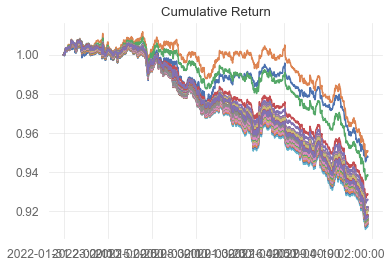

In [15]:
static_ret_list = []
static_vol_list = []
for p in range(len(static_cov_portfolios)):
    ret, vol = u.backtest.portfolio_backtest(static_cov_portfolios[p],hour_df_usd_price_tr)
    static_ret_list.append(ret.iloc[-1])
    static_vol_list.append(vol)

21
0.9509091011457468


Text(0.5, 1.0, 'Portfolio return vs covariance lookback')

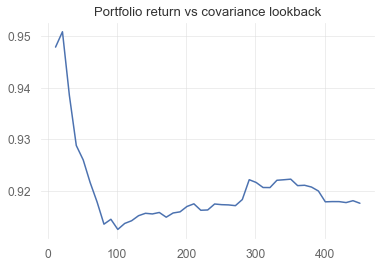

In [17]:
static_best = static_ret_list.index(max(static_ret_list))
print(lookbacks[static_best])
print(static_ret_list[static_best])
plt.plot(lookbacks,static_ret_list)
plt.title('Portfolio return vs covariance lookback')

61
0.003511387760586966


Text(0.5, 1.0, 'Portfolio vol (Daily) vs covariance lookback')

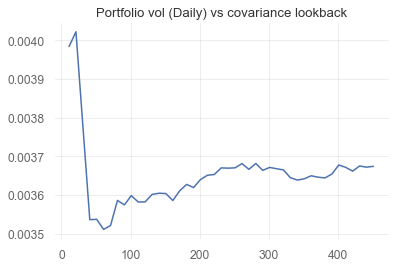

In [88]:
static_best_vol = static_vol_list.index(min(static_vol_list))
print(lookbacks[static_best_vol])
print((static_vol_list[static_best_vol]*(23))**(1/2))
plt.plot(lookbacks, np.array((static_vol_list)*(23))**(1/2))
plt.title('Portfolio vol (Daily) vs covariance lookback')

In [169]:
static_cov_portfolios[static_best_vol].transpose()

,2022-01-31 23:00:00
USD.EUR.SPOT,0.14862
USD.JPY.SPOT,0.37122
USD.CAD.SPOT,0.16952
USD.AUD.SPOT,0.00000
USD.GBP.SPOT,0.17147
USD.NZD.SPOT,0.03885
USD.MXN.SPOT,0.00000
USD.NOK.SPOT,0.00000
USD.SEK.SPOT,0.00000
USD.TRY.SPOT,0.10031


## Zoom in on the first 10

In [163]:
lookbacks_n = np.arange(len(hour_df_usd_price.columns),21)
static_cov_portfolios_n = []
i=0
for l in lookbacks_n:
        i+=1
        new_port = u.portfolio.markowitz_rebalance(hour_df_usd_price_tr,None,l,verbose=False, static_start_date='2022-02-01')
        static_cov_portfolios_n.append(new_port)
        if i%10==0:
            print(i)

10


10
0.9543194028130855


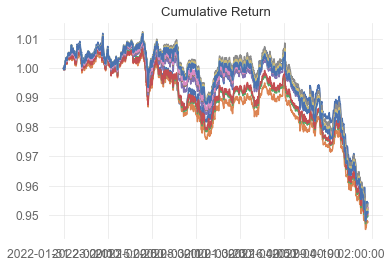

In [165]:
static_ret_list_n = []
for p in range(len(static_cov_portfolios_n)):
    ret , _ = u.backtest.portfolio_backtest(static_cov_portfolios_n[p],hour_df_usd_price_tr)
    static_ret_list_n.append(ret.iloc[-1])
static_best_n = static_ret_list_n.index(max(static_ret_list_n))
print(lookbacks_n[static_best_n])
print(static_ret_list_n[static_best_n])

Text(0.5, 1.0, 'Portfolio return vs covariance lookback')

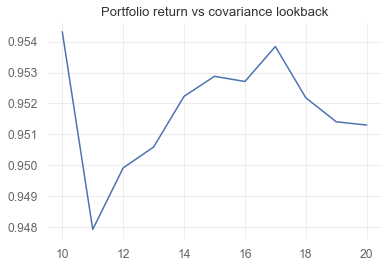

In [166]:
plt.plot(lookbacks_n,static_ret_list_n)
plt.title('Portfolio return vs covariance lookback')

In [168]:
static_cov_portfolios[0].transpose()

,2022-01-31 23:00:00
USD.EUR.SPOT,0.08034
USD.JPY.SPOT,0.15569
USD.CAD.SPOT,0.16196
USD.AUD.SPOT,0.15422
USD.GBP.SPOT,0.12019
USD.NZD.SPOT,0.11671
USD.MXN.SPOT,0.02343
USD.NOK.SPOT,0.00000
USD.SEK.SPOT,0.02048
USD.TRY.SPOT,0.16700


## Rebalancing

In [25]:
rebal_freqs = np.arange(1,12)
lookbacks = np.arange(len(hour_df_usd_price.columns)+1,120,10)
portfolios = []
i=0
for r in rebal_freqs:
    for l in lookbacks:
        if l >= r:
            i+=1
            new_port = u.portfolio.markowitz_rebalance(hour_df_usd_price_tr,r,l,verbose=False, static_start_date='2022-02-01')
            portfolios.append(new_port)
            if i%10==0:
                print(i)

10
20
30
40
50
60
70
80
90
100
110
120


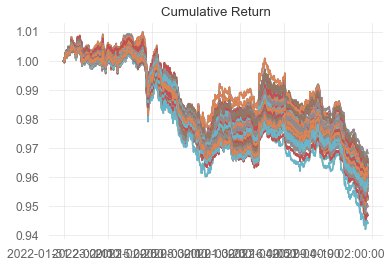

In [27]:
pair_list = []
lb_axis = []
rb_axis = []
for r in rebal_freqs:
    for l in lookbacks:
        if l >= r:
            pair_list.append(str(r) +' '+ str(l))
            lb_axis.append(l)
            rb_axis.append(r)
ret_list = []
var_list = []
for p in range(len(portfolios)):
    ret_list.append(u.backtest.portfolio_backtest(portfolios[p],hour_df_usd_price_tr)[0].iloc[-1])
    var_list.append(u.backtest.portfolio_backtest(portfolios[p],hour_df_usd_price_tr)[1])
    #print(pair_list[p])

2 31
0.9681792460126347


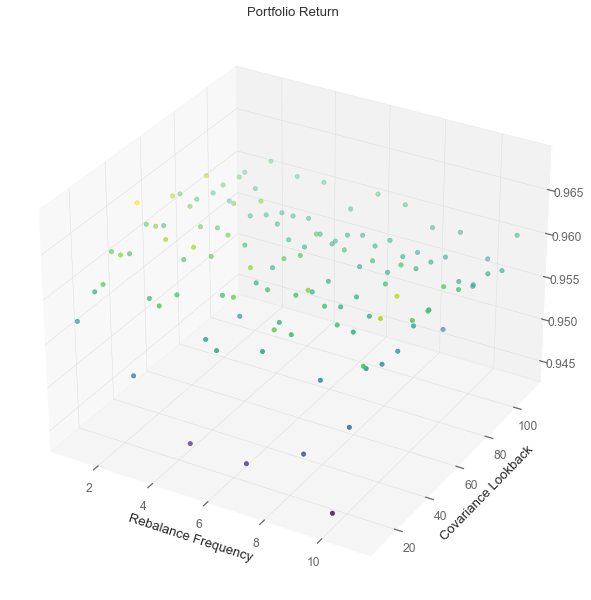

In [34]:

ax = plt.axes(projection='3d')
ax.scatter(rb_axis, lb_axis, ret_list, c=ret_list, cmap='viridis', linewidth=0.5)
plt.xlabel('Rebalance Frequency')
plt.ylabel('Covariance Lookback')
plt.title('Portfolio Return')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

2 31
0.9681792460126347


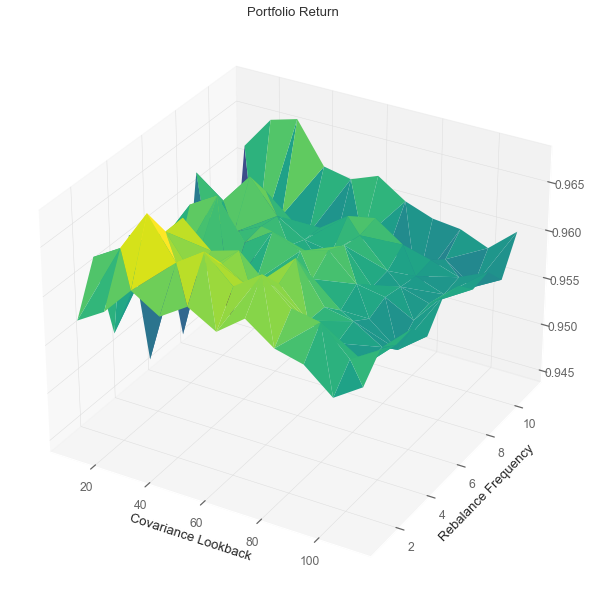

In [171]:
best = ret_list.index(max(ret_list))
var_best = var_list.index(min(var_list))
print(pair_list[best])
print(ret_list[best])
ax = plt.axes(projection='3d')
ax.plot_trisurf(lb_axis, rb_axis, ret_list,
                cmap='viridis', edgecolor='none');
plt.ylabel('Rebalance Frequency')
plt.xlabel('Covariance Lookback')
plt.title('Portfolio Return')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

                           Strategy
-------------------------  ----------
Start Period               2022-01-04
End Period                 2022-04-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -2.92%
CAGR﹪                     -8.98%

Sharpe                     -0.38
Smart Sharpe               -0.36
Sortino                    -0.55
Smart Sortino              -0.51
Sortino/√2                 -0.39
Smart Sortino/√2           -0.36
Omega                      0.93

Max Drawdown               -4.87%
Longest DD Days            105
Volatility (ann.)          1.06%
Calmar                     -1.84
Skew                       0.49
Kurtosis                   6.69

Expected Daily %           -0.0%
Expected Monthly %         -0.74%
Expected Yearly %          -2.92%
Kelly Criterion            -3.41%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.11%
Expected Shortfall (cVaR)  -0.11%

Gain/Pain Ratio            -0.25
Gain/Pain (1M)     

(2022-01-04 06:00:00    1.000000
 2022-01-04 07:00:00    1.000730
 2022-01-04 08:00:00    1.000140
 2022-01-04 09:00:00    1.000678
 2022-01-04 10:00:00    1.000046
                          ...   
 2022-04-29 16:00:00    0.971663
 2022-04-29 17:00:00    0.972418
 2022-04-29 18:00:00    0.972999
 2022-04-29 19:00:00    0.971092
 2022-04-29 20:00:00    0.970796
 Length: 1833, dtype: float64,
 0.0006662721078006511)

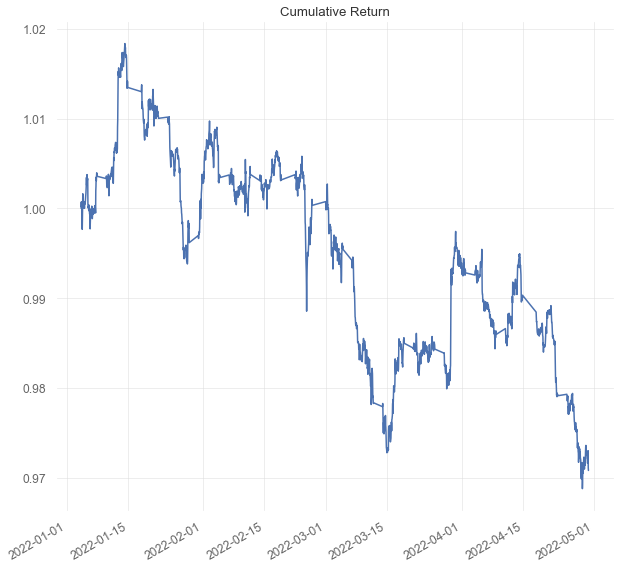

In [295]:
u.backtest.portfolio_backtest(portfolios[best],hour_df_usd_price_tr,tearsheet=True, mode='full')

1 101
0.002931699730365718


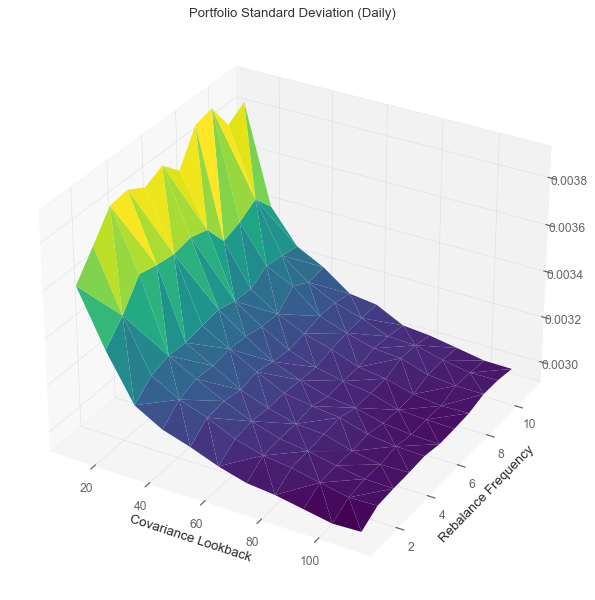

In [172]:
print(pair_list[var_best])
print((var_list[var_best]*(23))**(1/2))
ax = plt.axes(projection='3d')
ax.plot_trisurf( lb_axis,rb_axis, (np.array(var_list)*(23))**(1/2),
                cmap='viridis', edgecolor='none')
plt.ylabel('Rebalance Frequency')
plt.xlabel('Covariance Lookback')
plt.title('Portfolio Standard Deviation (Daily)')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

                           Strategy
-------------------------  ----------
Start Period               2022-01-07
End Period                 2022-04-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -4.41%
CAGR﹪                     -13.66%

Sharpe                     -0.67
Smart Sharpe               -0.64
Sortino                    -0.93
Smart Sortino              -0.9
Sortino/√2                 -0.66
Smart Sortino/√2           -0.64
Omega                      0.89

Max Drawdown               -5.71%
Longest DD Days            105
Volatility (ann.)          0.97%
Calmar                     -2.39
Skew                       0.36
Kurtosis                   5.59

Expected Daily %           -0.0%
Expected Monthly %         -1.12%
Expected Yearly %          -4.41%
Kelly Criterion            -5.96%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.1%
Expected Shortfall (cVaR)  -0.1%

Gain/Pain Ratio            -0.39
Gain/Pain (1M)       

(2022-01-07 17:00:00    1.000000
 2022-01-07 18:00:00    1.000376
 2022-01-07 19:00:00    1.000853
 2022-01-07 20:00:00    1.000750
 2022-01-07 21:00:00    1.000542
                          ...   
 2022-04-29 16:00:00    0.956374
 2022-04-29 17:00:00    0.956660
 2022-04-29 18:00:00    0.957682
 2022-04-29 19:00:00    0.956008
 2022-04-29 20:00:00    0.955934
 Length: 1753, dtype: float64,
 0.0006089075570823646)

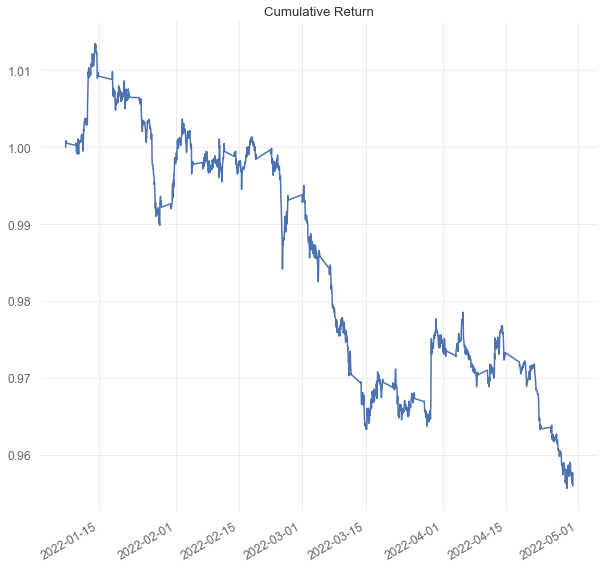

In [312]:
u.backtest.portfolio_backtest(portfolios[var_best],hour_df_usd_price_tr,tearsheet=True, mode='full')

## Try longer lookback, since our variance was still going down at minimum

In [38]:
rebal_freqs_s = np.arange(1,2)
lookbacks_s = np.arange(100,23*21,10)
portfolios_s = []
i=0
for r in rebal_freqs_s:
    for l in lookbacks_s:
        if l >= r:
            i+=1
            new_port_s = u.portfolio.markowitz_rebalance(hour_df_usd_price_tr,r,l,verbose=False, static_start_date='2022-02-01')
            portfolios_s.append(new_port_s)
            if i%10==0:
                print(i)

10
20
30


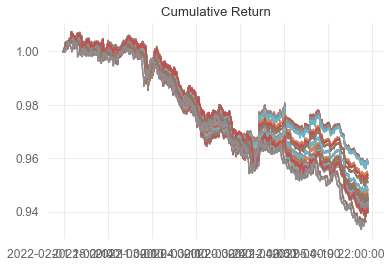

In [39]:
pair_list_s = []
lb_axis_s = []
rb_axis_s = []
for r in rebal_freqs_s:
    for l in lookbacks_s:
        if l >= r:
            pair_list_s.append(str(r) +' '+ str(l))
            lb_axis_s.append(l)
            rb_axis_s.append(r)
ret_list_s = []
var_list_s = []
for p in range(len(portfolios_s)):
    ret_list_s.append(u.backtest.portfolio_backtest(portfolios_s[p],hour_df_usd_price_tr)[0].iloc[-1])
    var_list_s.append(u.backtest.portfolio_backtest(portfolios_s[p],hour_df_usd_price_tr)[1])

1 110
0.9582891808360233


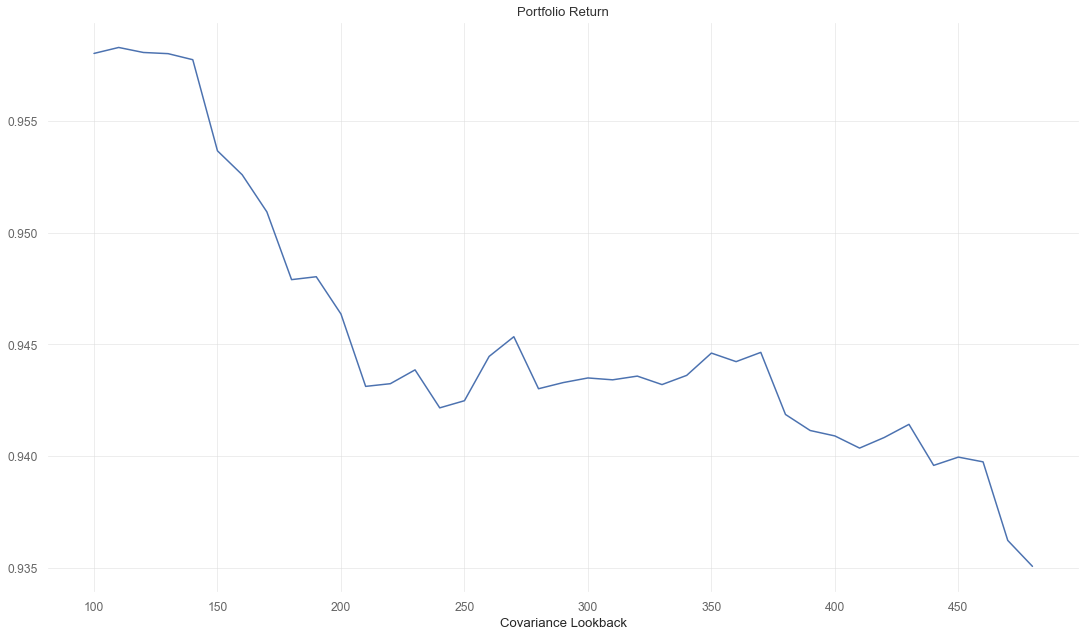

In [50]:
best_s = ret_list_s.index(max(ret_list_s))
var_best_s = var_list_s.index(min(var_list_s))
print(pair_list_s[best_s])
print(ret_list_s[best_s])
plt.plot(lb_axis_s, ret_list_s);
plt.xlabel('Covariance Lookback')
plt.title('Portfolio Return')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

1 100
0.002928900087734653


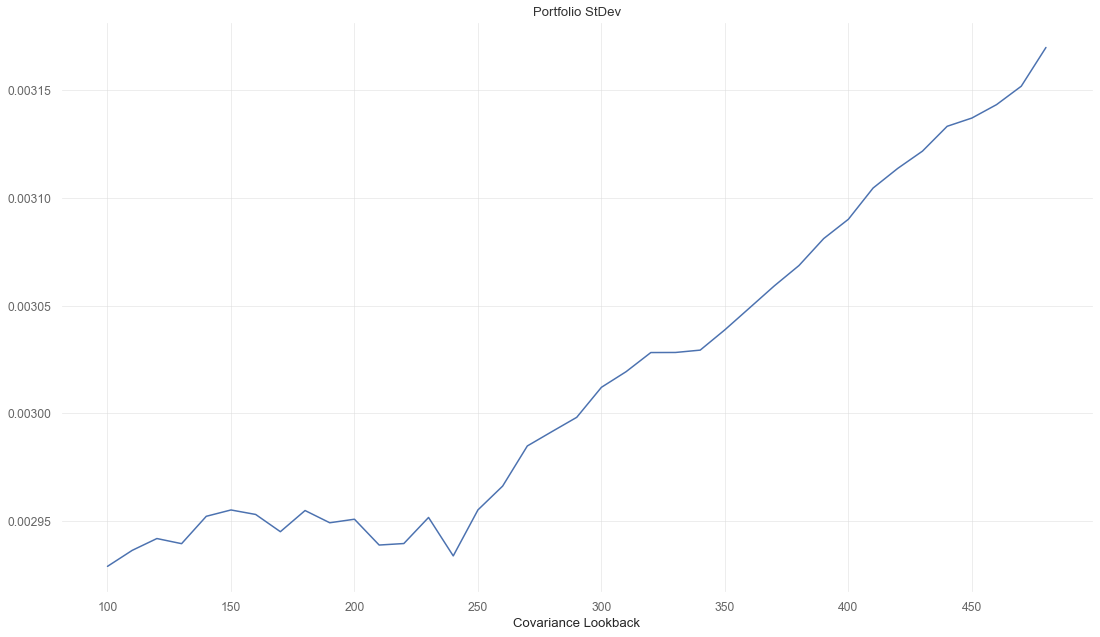

In [90]:
print(pair_list_s[var_best_s])
print((var_list_s[var_best_s]*(23))**(1/2))
plt.plot(lb_axis_s,np.array(var_list_s)*(23)**(1/2))
plt.xlabel('Covariance Lookback')
plt.title('Portfolio StDev (Daily)')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

## minutes

In [7]:
minute_df_mid_usd = pd.read_csv('../cleaned_data/minute_data_mid_usd.csv', index_col='time_utc')
minute_df_usd_price = 1/minute_df_mid_usd

minute_df_usd_price_tr = minute_df_usd_price.loc[:'2022-04-29']

In [8]:
minute_df_usd_price_tr

,USD.EUR.SPOT,USD.JPY.SPOT,USD.CAD.SPOT,USD.AUD.SPOT,USD.GBP.SPOT,USD.NZD.SPOT,USD.MXN.SPOT,USD.NOK.SPOT,USD.SEK.SPOT,USD.TRY.SPOT
time_utc,,,,,,,,,,
2022-01-02 23:00:00,1.137645,0.008687,0.791258,0.727215,1.353445,0.683795,0.048759,0.113541,0.110525,NaN
2022-01-02 23:01:00,1.137685,0.008688,0.791647,0.727310,1.353475,0.684170,0.048759,0.113544,0.110512,NaN
2022-01-02 23:02:00,1.137790,0.008687,0.791543,0.727335,1.353275,0.684550,0.048757,0.113575,0.110519,NaN
2022-01-02 23:03:00,1.137850,0.008687,0.791543,0.727355,1.353175,0.684575,0.048758,0.113582,0.110520,NaN
2022-01-02 23:04:00,1.137865,0.008688,0.791358,0.727325,1.353185,0.684560,0.048751,0.113593,0.110540,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-28 23:55:00,1.050275,0.007646,0.780887,0.710740,1.246300,0.649290,0.048888,0.106235,0.101165,0.067557
2022-04-28 23:56:00,1.050315,0.007645,0.780878,0.710735,1.246300,0.649195,0.048888,0.106241,0.101167,0.067557
2022-04-28 23:57:00,1.050275,0.007645,0.780902,0.710775,1.246305,0.649250,0.048888,0.106235,0.101164,0.067557


## Try big ranges

In [63]:
%%time
rebal_freqs_m = [1,15,30,60,120,60*11,60*23]
lookbacks_m = [11,60,23*60,23*60*5,23*60*21]
portfolios_m = []
i=0
for r in rebal_freqs_m:
    for l in lookbacks_m:
        if l >= r:
            i+=1
            new_port_m = u.portfolio.markowitz_rebalance(minute_df_usd_price_tr,r,l,verbose=False, static_start_date='2022-02-01')
            portfolios_m.append(new_port_m)
            print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
CPU times: total: 7h 51min 59s
Wall time: 2h 33min 18s


In [103]:
lb_axis_m = []
rb_axis_m = []
pair_list_m= []
for r in rebal_freqs_m:
    for l in lookbacks_m:
        if l >= r:
            pair_list_m.append(str(r) +' '+ str(l))
            lb_axis_m.append(l)
            rb_axis_m.append(r)

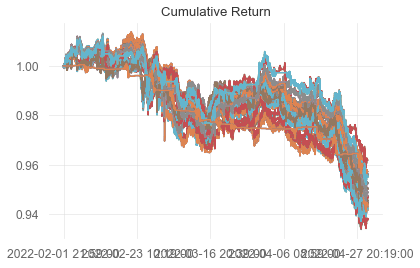

In [65]:
ret_list_m = []
var_list_m = []
for p in range(len(portfolios_m)):
    ret_list_m.append(u.backtest.portfolio_backtest(portfolios_m[p],minute_df_usd_price_tr)[0].iloc[-1])
    var_list_m.append(u.backtest.portfolio_backtest(portfolios_m[p],minute_df_usd_price_tr)[1])

660 6900
0.9619471664199725


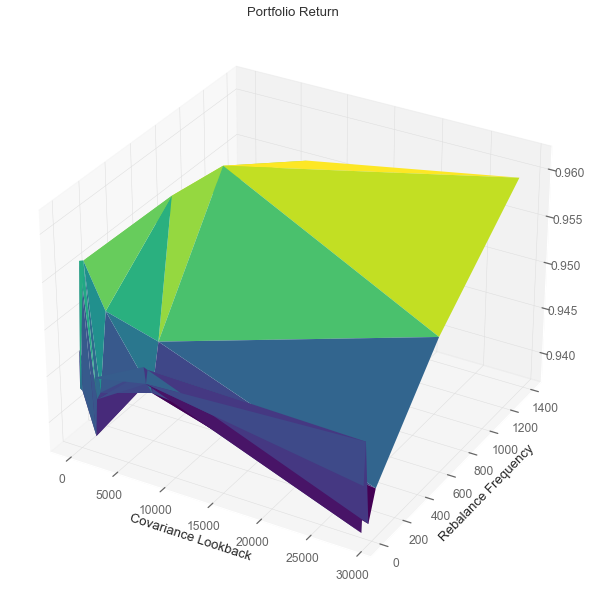

In [69]:
best_m = ret_list_m.index(max(ret_list_m))
var_best_m = var_list_m.index(min(var_list_m))
print(pair_list_m[best_m])
print(ret_list_m[best_m])
ax = plt.axes(projection='3d')
ax.plot_trisurf(lb_axis_m, rb_axis_m, ret_list_m,
                cmap='viridis', edgecolor='none');
plt.ylabel('Rebalance Frequency')
plt.xlabel('Covariance Lookback')
plt.title('Portfolio Return')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

1380 28980
0.0016807309293410625


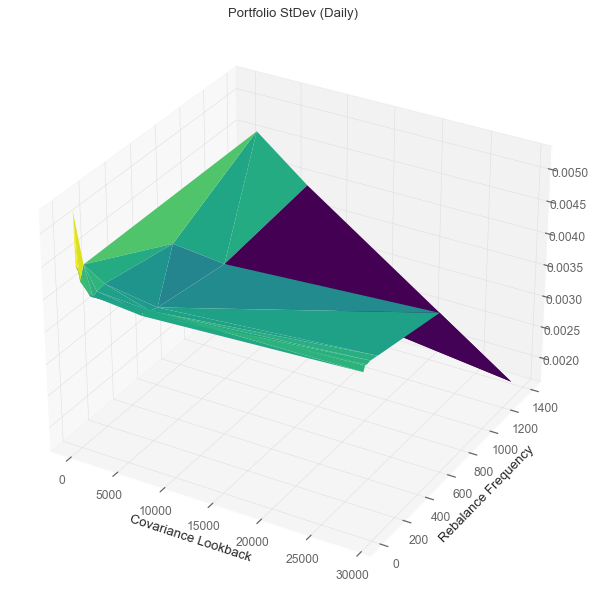

In [92]:
print(pair_list_m[var_best_m])
print((var_list_m[var_best_m]*(23*60))**(1/2))
ax = plt.axes(projection='3d')
ax.plot_trisurf(lb_axis_m, rb_axis_m, (nonp.array(var_list_m)*(23*60))**(1/2),
                cmap='viridis', edgecolor='none');
plt.ylabel('Rebalance Frequency')
plt.xlabel('Covariance Lookback')
plt.title('Portfolio StDev (Daily)')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [98]:
%%time
rebal_freqs_m2 = [int(60*23*1.5), 60*23*2, 60*23*3, 60*23*4, 60*23*5]
lookbacks_m2 = [23*60*21, 23*60*31]
portfolios_m2 = portfolios_m.copy()

i=0
for r in rebal_freqs_m2:
    for l in lookbacks_m2:
        if l >= r:
            i+=1
            new_port_m = u.portfolio.markowitz_rebalance(minute_df_usd_price_tr,r,l,verbose=False, static_start_date='2022-02-15')
            portfolios_m2.append(new_port_m)
            print(i)

1
2
3
4
5
6
7
8
9
10
CPU times: total: 53 s
Wall time: 14.6 s


In [110]:
lb_axis_m2 = lb_axis_m.copy()
rb_axis_m2 = rb_axis_m.copy()
pair_list_m2= pair_list_m.copy()

for r in rebal_freqs_m2:
    for l in lookbacks_m2:
        if l >= r:
            pair_list_m2.append(str(r) +' '+ str(l))
            lb_axis_m2.append(l)
            rb_axis_m2.append(r)

26
27
28
29
30
31
32
33
34
35
CPU times: total: 21min 41s
Wall time: 21min 44s


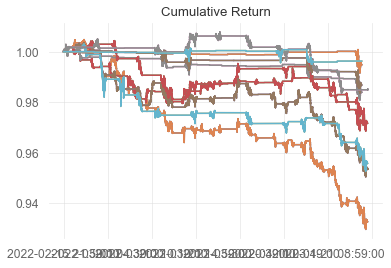

In [113]:
%%time
ret_list_m2 = ret_list_m.copy()
var_list_m2 = var_list_m.copy()
for p in range(len(portfolios_m),len(portfolios_m2)):
    ret_list_m2.append(u.backtest.portfolio_backtest(portfolios_m2[p],minute_df_usd_price_tr)[0].iloc[-1])
    var_list_m2.append(u.backtest.portfolio_backtest(portfolios_m2[p],minute_df_usd_price_tr)[1])
    print(p)

0.9963614124801514
0.013838674790344199
45


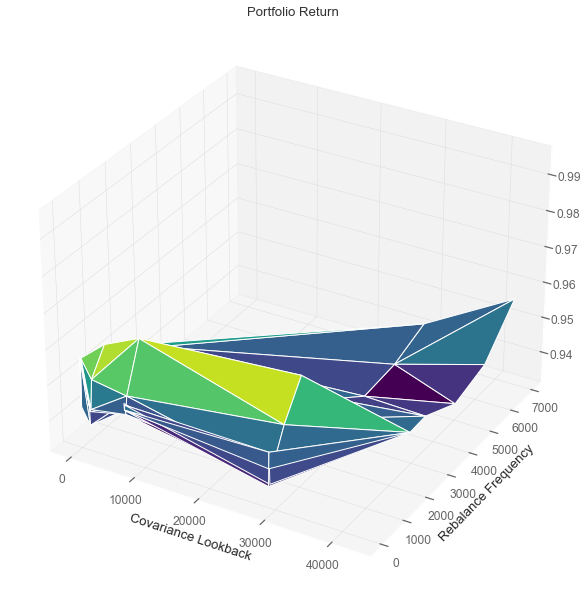

In [222]:
best_m2 = ret_list_m2.index(max(ret_list_m2))
var_best_m2 = var_list_m2.index(min(var_list_m2))
#print(pair_list_m2[best_m2])
print(ret_list_m2[best_m2])
print(var_list_m2[best_m2-1]*(23*60*252)**(1/2))
print(best_m2)
ax = plt.axes(projection='3d')
ax.plot_trisurf(lb_axis_m2, rb_axis_m2, ret_list_m2,
                cmap='viridis');
plt.ylabel('Rebalance Frequency')
plt.xlabel('Covariance Lookback')
plt.title('Portfolio Return')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

0.013677259971795157
4140 28980
0.9557856662282311


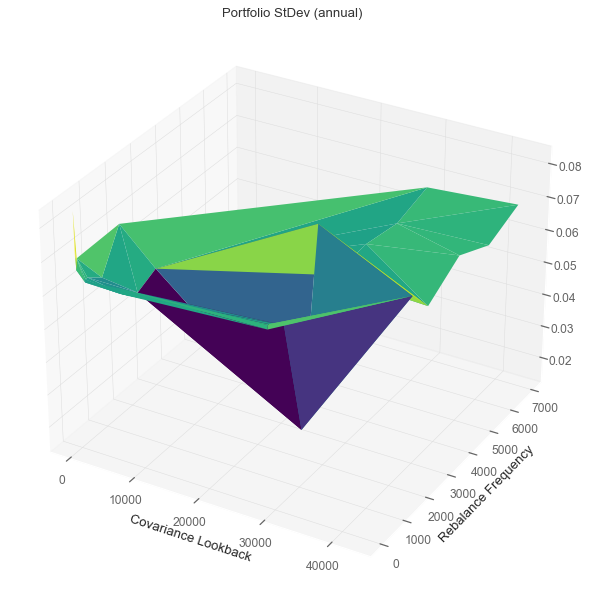

In [199]:
#print(pair_list_m2[var_best_m2])
print(var_list_m2[var_best_m2]*(23*60*252)**(1/2))
ax = plt.axes(projection='3d')
ax.plot_trisurf(lb_axis_m2, rb_axis_m2, np.array(var_list_m2)*(23*60*252)**(1/2),
                cmap='viridis', edgecolor='none');
plt.ylabel('Rebalance Frequency')
plt.xlabel('Covariance Lookback')
plt.title('Portfolio StDev (annual)')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
print(pair_list_m2[-6])
print(ret_list_m2[var_best_m2])

In [200]:
%%time
rebal_freqs_m3 = np.arange(2000,5000,500)
lookbacks_m3 = np.arange(20000,45000,5000)
portfolios_m3 = []
i=0
for r in rebal_freqs_m3:
    for l in lookbacks_m3:
        if l >= r:
            i+=1
            new_port_m = u.portfolio.markowitz_rebalance(minute_df_usd_price_tr,r,l,verbose=False, static_start_date='2022-02-15')
            portfolios_m3.append(new_port_m)
            print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
CPU times: total: 2min 38s
Wall time: 43.6 s


In [206]:
lb_axis_m3 = []
rb_axis_m3 = []
pair_list_m3 = []

for r in rebal_freqs_m3:
    for l in lookbacks_m3:
        if l >= r:
            pair_list_m3.append(str(r) +' '+ str(l))
            lb_axis_m3.append(l)
            rb_axis_m3.append(r)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
CPU times: total: 34min 43s
Wall time: 34min 39s


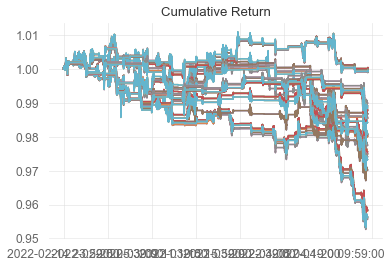

In [207]:
%%time
ret_list_m3 = []
var_list_m3 = []
for p in range(len(portfolios_m3)):
    ret_list_m3.append(u.backtest.portfolio_backtest(portfolios_m3[p],minute_df_usd_price_tr)[0].iloc[-1])
    var_list_m3.append(u.backtest.portfolio_backtest(portfolios_m3[p],minute_df_usd_price_tr)[1])
    print(p)

3000 25000
1.0005442210553321


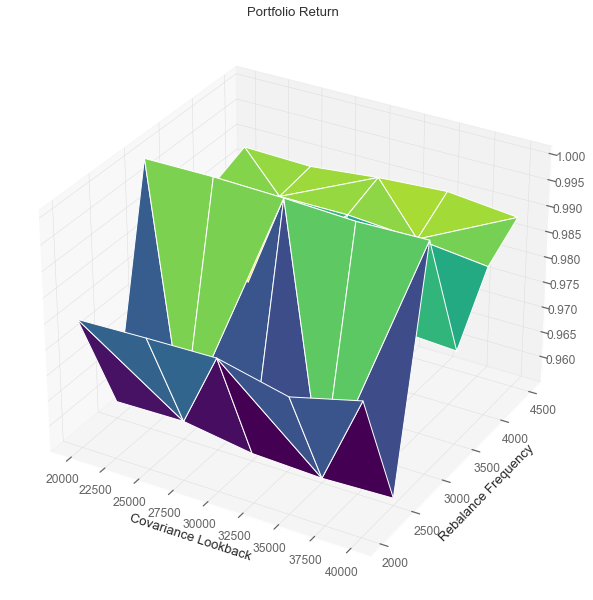

In [208]:
best_m3 = ret_list_m3.index(max(ret_list_m3))
var_best_m3 = var_list_m3.index(min(var_list_m3))
print(pair_list_m3[best_m3])
print(ret_list_m3[best_m3])
ax = plt.axes(projection='3d')
ax.plot_trisurf(lb_axis_m3, rb_axis_m3, ret_list_m3,
                cmap='viridis');
plt.ylabel('Rebalance Frequency')
plt.xlabel('Covariance Lookback')
plt.title('Portfolio Return')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

<AxesSubplot:xlabel='Rebalance Freq', ylabel='Cov LB'>

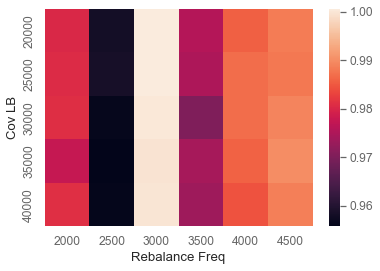

In [228]:
import seaborn as sns
data = pd.DataFrame(data={'Cov LB':lb_axis_m3, 'Rebalance Freq':rb_axis_m3, 'Annual Vol':ret_list_m3})
data = data.pivot(index='Cov LB', columns='Rebalance Freq', values='Annual Vol')
sns.heatmap(data)

4000 20000
0.03327844297516769


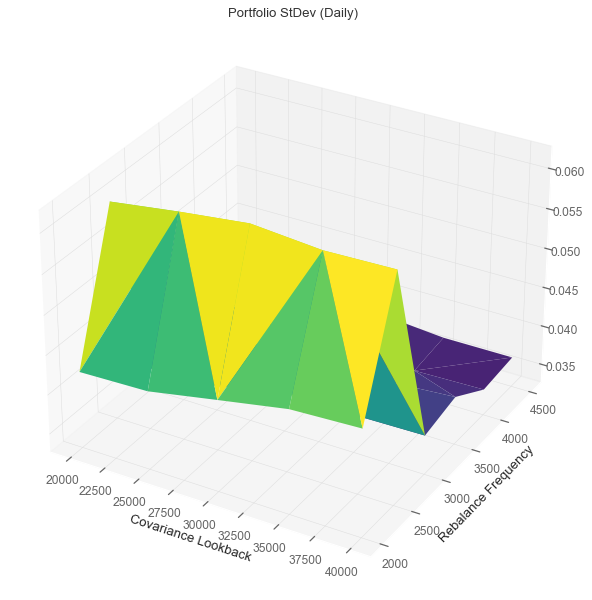

In [209]:
print(pair_list_m3[var_best_m3])
print(var_list_m3[var_best_m3]*(23*60*252)**(1/2))
ax = plt.axes(projection='3d')
ax.plot_trisurf(lb_axis_m3, rb_axis_m3, np.array(var_list_m3)*(23*60*252)**(1/2),
                cmap='viridis', edgecolor='none');
plt.ylabel('Rebalance Frequency')
plt.xlabel('Covariance Lookback')
plt.title('Portfolio StDev (annual)')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

<AxesSubplot:xlabel='Rebalance Freq', ylabel='Cov LB'>

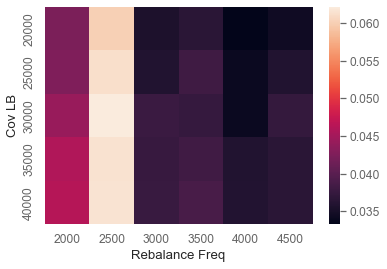

In [230]:
import seaborn as sns
data = pd.DataFrame(data={'Cov LB':lb_axis_m3, 'Rebalance Freq':rb_axis_m3, 'Annual Vol':np.array(var_list_m3)*(23*60*252)**(1/2)})
data = data.pivot(index='Cov LB', columns='Rebalance Freq', values='Annual Vol')
sns.heatmap(data)

## Test Set on the optimal minutely range

In [232]:
minute_df_usd_price_te = minute_df_usd_price.loc['2022-04-30':]
minute_df_usd_price_te

,USD.EUR.SPOT,USD.JPY.SPOT,USD.CAD.SPOT,USD.AUD.SPOT,USD.GBP.SPOT,USD.NZD.SPOT,USD.MXN.SPOT,USD.NOK.SPOT,USD.SEK.SPOT,USD.TRY.SPOT
time_utc,,,,,,,,,,
2022-05-01 22:00:00,1.054910,0.007700,0.778098,0.706700,1.258015,0.646255,0.048942,0.106772,0.101973,0.067257
2022-05-01 22:01:00,1.054815,0.007701,0.778147,0.706720,1.257980,0.646235,0.048957,0.106763,0.101964,0.067266
2022-05-01 22:02:00,1.054900,0.007701,0.778319,0.706750,1.258425,0.646510,0.048962,0.106771,0.101928,0.067266
2022-05-01 22:03:00,1.054995,0.007702,0.778522,0.706750,1.258520,0.646615,0.048991,0.106781,0.101936,0.067262
2022-05-01 22:04:00,1.055010,0.007699,0.778616,0.706935,1.258620,0.646595,0.048993,0.106782,0.101938,0.067269
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 20:55:00,1.048300,0.007366,0.776759,0.690375,1.217775,0.624425,0.049739,0.101538,0.097810,0.059778
2022-06-30 20:56:00,1.048300,0.007366,0.776759,0.690375,1.217750,0.624425,0.049755,0.101538,0.097817,0.059778
2022-06-30 20:57:00,1.048300,0.007366,0.776699,0.690425,1.217850,0.624500,0.049752,0.101538,0.097817,0.059778


In [233]:
%%time
rebal_freqs_m3 = np.arange(2000,5000,500)
lookbacks_m3 = np.arange(20000,45000,5000)
portfolios_test = []

i=0
for r in rebal_freqs_m3:
    for l in lookbacks_m3:
        if l >= r:
            i+=1
            new_port_m = u.portfolio.markowitz_rebalance(minute_df_usd_price,r,l,verbose=False, static_start_date='2022-05-01')
            portfolios_test.append(new_port_m)
            print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
CPU times: total: 1min 24s
Wall time: 22.6 s


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
CPU times: total: 41min 39s
Wall time: 42min 23s


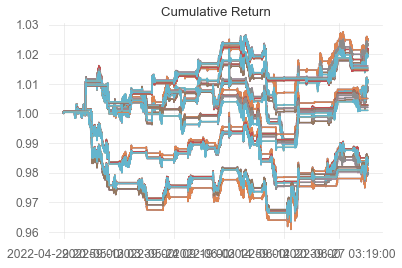

In [234]:
%%time
ret_list_test = []
var_list_test = []
for p in range(len(portfolios_test)):
    bt = u.backtest.portfolio_backtest(portfolios_test[p],minute_df_usd_price)
    ret_list_test.append(bt[0].iloc[-1])
    var_list_test.append(bt[1])
    print(p)

2000 20000
1.0244828451620152


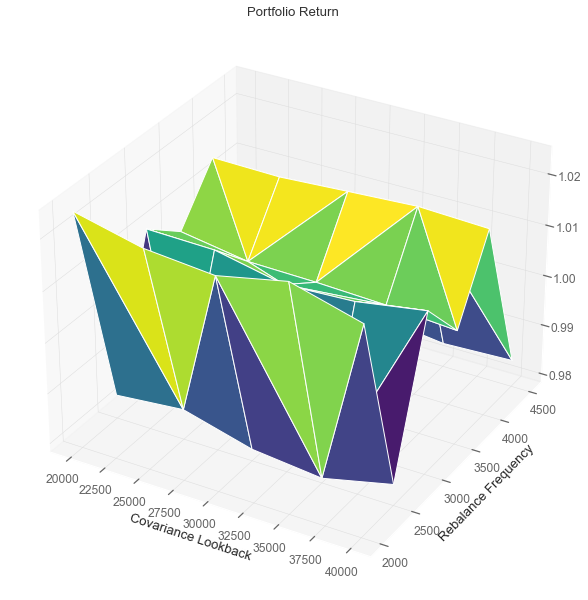

In [235]:
best_test = ret_list_test.index(max(ret_list_test))
var_best_test = var_list_test.index(min(var_list_test))
print(pair_list_m3[best_test])
print(ret_list_test[best_test])
ax = plt.axes(projection='3d')
ax.plot_trisurf(lb_axis_m3, rb_axis_m3, ret_list_test,
                cmap='viridis');
plt.ylabel('Rebalance Frequency')
plt.xlabel('Covariance Lookback')
plt.title('Portfolio Return')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

<AxesSubplot:xlabel='Rebalance Freq', ylabel='Cov LB'>

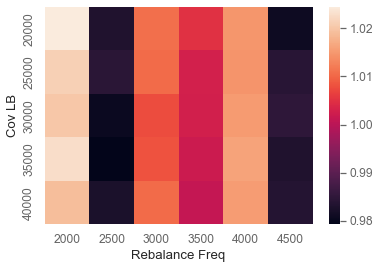

In [236]:
data = pd.DataFrame(data={'Cov LB':lb_axis_m3, 'Rebalance Freq':rb_axis_m3, 'Annual Vol':ret_list_test})
data = data.pivot(index='Cov LB', columns='Rebalance Freq', values='Annual Vol')
sns.heatmap(data)

4000 35000
0.035046132312932424


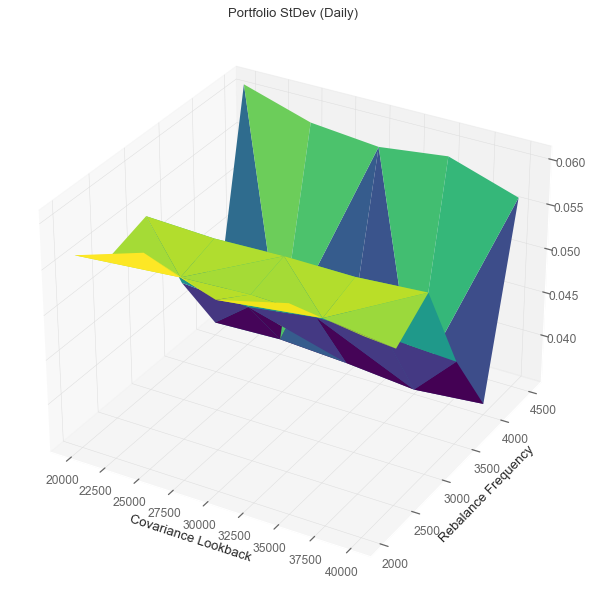

In [237]:
print(pair_list_m3[var_best_test])
print(var_list_test[var_best_test]*(23*60*252)**(1/2))
ax = plt.axes(projection='3d')
ax.plot_trisurf(lb_axis_m3, rb_axis_m3, np.array(var_list_test)*(23*60*252)**(1/2),
                cmap='viridis', edgecolor='none')
plt.ylabel('Rebalance Frequency')
plt.xlabel('Covariance Lookback')
plt.title('Portfolio StDev (Daily)')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

<AxesSubplot:xlabel='Rebalance Freq', ylabel='Cov LB'>

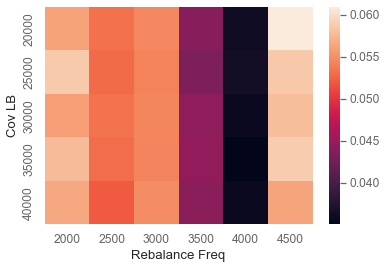

In [238]:
data = pd.DataFrame(data={'Cov LB':lb_axis_m3, 'Rebalance Freq':rb_axis_m3, 'Annual Vol':np.array(var_list_test)*(23*60*252)**(1/2)})
data = data.pivot(index='Cov LB', columns='Rebalance Freq', values='Annual Vol')
sns.heatmap(data)

In [ ]:
###